# Machine Learning (CMP3751M/CMP9772M) - Assessment 02

Through the following notebook, you will be analysing a dataset and fitting a classification model to this dataset.

The assessment is structured as follows:
- [Dataset description](#Dataset-description)
- [Loading the dataset](#Loading-the-dataset)
- [Simple classification model](#Simple-classification-model)
    - [Creating a training and testing set](#Creating-a-training-and-testing-set)
    - [Training a classifier](#Training-a-classifier)
- [Improved evaluation strategy](#Improved-evaluation-strategy)
- [Different models and parameter search](#Different-models-and-parameter-search)
- [Ensembles](#Ensembles)
- [Final model evaluation](#Final-model-evaluation)
- [References](#References)

**Notes:**
- The (%) noted above are out of 100; this will be scaled down to **maximum of 60 marks** for the assessment **(or maximum of 50 marks for CMP9772M)** .
- Any discussion not supported by your implementation will not be awarded marks.
- **Do not modify** and code provided as a **TESTING CELL**.
- Make sure to **fix all the random seeds** in any parts of your solution, so it can be reproduced exactly.
- The notebook, as provided, runs without errors (without solving the assessment). Make sure that the solution, or the partial solution, you hand in, also **runs without errors** on the data provided. If you have a partial solution causing errors which you would like to show, please include it as a comment.
- Take care to include references to any external sources used. Check the [References](#References) section, the below cell, and the exambles through the assessment text for examples of how to do this.


In [1]:
# Remember to reference your sources! Check the bottom of the file, and examples used in the text of the assessment,
# for including references to papers and software in your textual answers

# Also add a reference in your solution cell before defining a class/function/method, eg.:

# This code is a modified and extended version of [2]
# OR
# This code is a modified and extended version of https://stackoverflow.com/q/522563/884412
##############
## THE CODE ##
##############

## Dataset description

The the assessment will be done on the dataset containing only numerical features describing the physical and chemical properties of the Li-ion battery, which can be classified on the basis of their crystal system [1]. (The dataset for this assessment has been adapted from the full dataset which can be found [here](https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries), shared in the public domain by Divyansh Agrawal).

Each sample corresponds to the properties of a battery, and consists of following features:

| Feature Name      | Value | Description |
| :---------------- | :----- | ----------- |
| `Formation Energy`       | `float`: eV | Formation energy of the material. |
| `E Above Hull` | `float`: eV | Energy of decomposition of material into most stable ones. |
| `Band Gap` | `float`: eV | Band gap. |
| `Nsites` | `int`: count | Number of atoms in the unit cell of the crystal. |
| `Density` | `float`: gm/cc | The density of bulk crystalline materials. |
| `Volume` | `float` | The unit cell volume of the material. |

The goal for the assessment is to predict whether the crystal system of the battery is _monoclinic_, _orthorhombic_ or _triclinic_, which provides a classification for each sample:

| Class      | Value | Description |
| :---------------- | :----- | ----------- |
| `Crystal System`  | `string`: class designation | Class of the crystal system. |


## Loading the dataset

The dataset is given in _batteries.csv_ file provided on Blackboard. **Load the dataset into two [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html)s.**: 
- The variable `X` should be a 2D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing all the samples and their features from the dataset, one sample per row. 
- The variable `y` should be a 1D [`numpy.array`](https://numpy.org/doc/stable/reference/generated/numpy.array.html) containing the ground truth (class) as given in the `'Crystal System'` field of the _.csv_ file.
- _Note_: The class in the `'Crystal System'` column is given as a string. Make sure you encode the class as an integer number in your ground truth `y`.
- _Note_: You should make sure that your code for loading the dataset is guided by the information about the dataset, and the dataset description you provide as your answer.

**Describe the dataset**. Provide a basic description of the dataset. How many samples are there in the dataset? How many distinct classes? What types of features describe the samples in the dataset? Are there any missing values in the dataset? (Make sure these are properly handled). 
- _Note_: Make sure all your answers are supported by your implementation. Answers not supported by your implementation will not score any marks.

Provide your code to _load the dataset_ and the code that will allow you to _describe the dataset_ in the **SOLUTION CELL**. Provide your description of the dataset in the **ANSWER CELL**. A correct solution should result in no errors when running the **TESTING CELL** provided.

**SOLUTION CELL**

In [2]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import LabelEncoder

################################
#### ADD YOUR SOLUTION HERE ####
################################`

######## replace this code #####

# Read the dataset
df = pd.read_csv('batteries.csv')

# Analyse the dataset
num_samples = df.shape[0]
num_features = df.shape[1] - 1  
num_classes = df['Crystal System'].nunique()
missing_values = df.isnull().sum().sum()

# Handle missing values using median
df['Formation Energy'] = df['Formation Energy'].fillna(df['Formation Energy'].median())
df['Band Gap'] = df['Band Gap'].fillna(df['Band Gap'].median())
df['Density'] = df['Density'].fillna(df['Density'].median())

# Encode the 'Crystal System' column
encoder = LabelEncoder()
y = encoder.fit_transform(df['Crystal System'])

# Extract the features
X = df.drop('Crystal System', axis=1).values



**TESTING CELL**

In [3]:
assert(len(X.shape) == 2)
assert(len(y.shape) == 1)
assert(X.shape[0] == y.shape[0])

**ANSWER CELL**

The dataset has 399 samples, 6 features (Formation Energy, E Above Hull, Band Gap, Nsites, Density, Volume), 3 classes (Monoclinic, Orthorhombic, Triclinic) and there were 5 missing values. To handle the missing values, I decided on using a simple method of median imputation. The reason for this over a more complex imputation such a KNN imputation is because of how few missng values there were. There were only 5 missing values so using this method should not affect or skew the dataset and will have a much lower computational cost compared to a more complex method that wouldn't provide a significantly better result(Zhang, 2016). Each feature has some outliers however I haven't handled these by trimming them out as this may affect my results in the future and based on the fact we can assume there are no errors in the dataset I will leave them how they are for now.

## Simple classification model

To get the feel for the dataset, the first step will be to build train a simple classification model for this dataset. Do this in two steps detailed below:
1. Set aside some data for training and for testing.
2. Train a simple classifier on this data.

### Creating a training and testing set

**Set aside 20\% of the data for testing, and use the remaining 80\% to train your model.** Make sure to fix any random seeds if you use any functions or methods relying on those, so your experiments are _fully repeatable_. Initialise the following variables:
- `X_train` should contain the features corresponding to your training data.
- `y_train` should contain the ground truth of your training data.
- `X_test` should contain the features corresponding to your testing data.
- `y_train` should contain the ground truth associated to your testing data.

_Note:_ No additional marks will be rewarded for implementing an advanced data splitting strategy on this task. The purpose of this task is to start working with the dataset by applying a simple approach; you will have the chance to implement more complex evaluation pipelines in a later task.

Provide your implementation in the **SOLUTION CELL (a)** below. A correct solution should result in no errors when running the **TESTING CELL** provided.

### Training a classifier

**Train a simple classifier,** (of your choosing) **with fixed parameters** on the dataset, and **calculate accuracy on the test set**.
- Define a function `model_accuracy(y_test, y_pred)` to compare the ground truth given in `y_test` to predictions given in `y_pred` and calculate accuracy.
- **Store the model** in the variable named `model`. For the model, you may chose any classifier with which you are familiar (e.g. K Nearest Neighbours), or implement your own classifier. Make sure you **train your model** using the _training data_ only (`X_train`, `y_train`).
- Use the model to **predict the classes of the data** in the testing set (`X_test`), and calculate the accuracy by comparing the predictions with the ground truth for the testing set (`y_test`). **Store the predictions** in a variable called `y_test`.

_Note:_ Do not implement an advanced strategy to chose the parameters of your classifier here, as that will be a topic of a latter question.

_Note:_ If you implement your own classifier, make sure you implement it as a _class_ following the _sklearn_ standard for classifiers (i.e. make sure it implements the `fit(X, y)` method to train the model, and `predict(X)` method to use the trained model to predict the classes of provided samples.


**Discuss the advantages and shortcomings** of the evaluation strategy implemented through this task. Discuss both the data split used for evaluation and the choice of metric. Taking into account the information you know about the dataset, what kind of accuracy scores can you expect on this dataset from a good and bad performing model? Based on the information you have so far, comment on the performance of the model you have trained on the provided dataset.

Provide your implementation in the **SOLUTION CELL (b)** below. The **TESTING CELL** below should run without errors and will print the prediction of your model for the first sample in the test set, and the accuracy as calculated by your `model_accuracy` function. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL (a)**

In [4]:
from sklearn.model_selection import train_test_split

################################
#### ADD YOUR SOLUTION HERE ####
################################

######### replace these lines ##
#X_train = np.array([[2,1]])
#y_train = np.array([1])
#X_test = np.array([[2,1]])
#y_test = np.array([1])

#Split dataset into train and test 80/20
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

################################
# X_train = ...
# y_train = ...
# X_test = ...
# y_test = ...

**TESTING CELL**

In [5]:
assert(X_train.shape[0] == y_train.shape[0])
assert(X_test.shape[0] == y_test.shape[0])
assert(X_train.shape[1] == X_test.shape[1])

**SOLUTION CELL (b)**

In [6]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

def model_accuracy(y_test, y_pred):
    return accuracy_score(y_test, y_pred)

################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######

# Define the classifier
model = KNeighborsClassifier()
# Train the classifier
model.fit(X_train, y_train)
# Predict on the test set
y_predictions = model.predict(X_test)


**TESTING CELL**

In [7]:
print(model.predict(X_test[0].reshape(1,-1)))
print(model_accuracy(y_test, y_predictions))



[1]
0.45588235294117646


**ANSWER CELL**

From this dataset, a good performing model should be able to predict the battery class with a higher accuracy, a number closer to 1, however, with a complex dataset, even a good model may not achieve a very high accuracy score. Where as, a bad performing model will have a lower accuracy score, this can be expected when using a more simple model especially on a complex dataset. Accuracy was the only metric for this evaluation which may not be the best way to capture the complexity of the dataset and evaluate the model as accuracy cannot "distinguish between the number of correct labels of different classes"(Sokolova, Japkowicz and Szpakowicz, 2006), other things such as precision, recall, and the use of a confusion matrix would improve the evaluation of the model used which would also help improve predictions. In this code I used a 80% - 20% split where 80% of the data was used for training and 20% was used for testing. The model I chose for this task was the K Nearest Neighbours (KNN) for its simple implementation and it is also easy to understand which makes it a good starting point for this dataset and should allow me to implement a more complex model in future tasks. The simplicity of the KNN model does mean that the complexities of the dataset are not taken into account which may be a reason for the poor performance. The accuracy score of the model was 0.4 which implies that the model isn't very good at predicting the class based on the dataset meaning the dataset may be too complex for the KNN model. Another thing to consider is that outliers are in the dataset which could cause the model issues when predicting a class. This is something that may need to be dealt with in future tasks. Other things I should consider going forward should be cross-validation to remove the variability of the dataset, a more sophisticated model should be implemented to achieve a higher accuracy score and to get better predicion results, and also using more evaluation metrics to understand and predict the data better.(Peterson, 2009)

## Improved evaluation strategy

After discussing the shortcomings of the simple evaluation strategy used in the previous task, you now have a chance to **propose a better evaluation strategy.** Make sure your chosen strategy **uses all the samples in the dataset** to report the result.
- Implement a function `evaluate_model(model, X, y)` to implement your proposed evaluation strategy. The function should evaluate the model given in `model` on the dataset given by `X` with ground truth given by `y`. Note that the function should be passed the _whole of the dataset_ (see **TESTING CELL** below) and should take care of any data splitting internally.
- If desired, you may add additional arguments to this function, as long as they have default values and the function runs correctly when called using those default values.
- The function should return no values, but instead print the results of the evaluation in a human-readable format.
- Include at least one summative metric (providing a single number, e.g. accuracy) and per-class metric (e.g. precision). You are encouraged to select more than one metric of each type.

This function will be used to provide a better evaluation of the simple model with fixed parameters used in the previous task.

**Discuss your chosen evaluation strategy**, including both the data split and the evaluation metrics. Which data splitting strategy did you chose and why? Which metrics did you chose, and why? Briefly explain the chosen data splitting strategy. What additional information can your additional metrics provide beyond accuracy?

Provide your implementation of this function in the **SOLUTION CELL**. You may also include any additional evaluation calls you want to include in this code cell. The **TESTING CELL** will perform a basic evaluation of your `model` using the `evaluate_model` function implemented for this task. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [13]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
from sklearn.metrics import classification_report,accuracy_score, f1_score

def evaluate_model(model, X, y, n_splits=4):
    print(f'Evaluating model {model} ...')
    ################################
    #### ADD YOUR SOLUTION HERE ####
    ################################
    # Using StratifiedKFold for cross-validation to maintain the proportion of each class
    skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

    # Summative Metric is Accuracy
    accuracies = cross_val_score(model, X, y, cv=skf, scoring='accuracy')
    print(f"Average Accuracy: {accuracies.mean():.2f} (+/- {accuracies.std() * 2:.2f})")

    # Per-Class Metrics are Precision, Recall, F1-Score
    # Iterating over each fold and training the model,
    # then predicting and generating a classification report.
    for train_index, test_index in skf.split(X, y):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]
        # Train model on the current fold
        model.fit(X_train, y_train)
        # Predictions based on current fold
        y_pred = model.predict(X_test)
        # Print the report
        print(classification_report(y_test, y_pred, target_names=encoder.classes_))

**TESTING CELL**

In [14]:
evaluate_model(model, X, y)

Evaluating model KNeighborsClassifier() ...
Average Accuracy: 0.55 (+/- 0.10)
              precision    recall  f1-score   support

  monoclinic       0.45      0.57      0.51        35
orthorhombic       0.53      0.50      0.52        32
   triclinic       0.55      0.33      0.41        18

    accuracy                           0.49        85
   macro avg       0.51      0.47      0.48        85
weighted avg       0.50      0.49      0.49        85

              precision    recall  f1-score   support

  monoclinic       0.58      0.74      0.65        35
orthorhombic       0.68      0.66      0.67        32
   triclinic       0.67      0.33      0.44        18

    accuracy                           0.62        85
   macro avg       0.64      0.58      0.59        85
weighted avg       0.63      0.62      0.61        85

              precision    recall  f1-score   support

  monoclinic       0.57      0.60      0.58        35
orthorhombic       0.59      0.69      0.64        

**ANSWER CELL**

The data splitting strategy I chose for this task was k-fold cross-validation. For this, the data is split into 'k' folds and then the 'k' number is used to determine how many times the model is trained and tested. I chose a 'k' number of 4 as it seemed to provide the best results. Using this approach gets the most out of the data as it ensures all datapoints are used for the training and the testing. This approach is better than a single iteration of a test train split as it "can stabilize the variability of accuracy estimates"(Wong and Yeh, 2020). stratification was also used in this split as it keeps a balanced amount of each class in each fold and as this dataset has imbalanced class amounts, using stratified sampling helps to make sure each fold is representative of the dataset as a whole.

The metrics I chose to use for this model evaluation were accuracy, precision, recall, and F1 score. Accuracy was the only summative metric I used and it helps to give an overall look at how good the model is at predicting the classes. The first of the per-class metrics I used was precision, This allows us to see how many false positives the model gives. A lower precision score indicates more false positives and vice versa. Recall shows the models ability to find all the positive instances. A higher recall number shows a lower false negative rate. F1 score uses both precision and recall, a higher F1 score shows that the model can balance not missing positives and not misclassifying negatives as positives(Sokolova, Japkowicz and Szpakowicz, 2006). As the dataset has an imbalanced amount of each class, using these metrics allow us to see how the model deals with each class seperately. This level of analysis is overlooked by just using an accuracy score. The support column in the summary shows how many instances of each class was used in each fold. This helps us get a better look at the amount of each class the model was trained and tested on during each individual fold and if they are imbalanced we should take it into account when interpretting the model evaluation. For example, if the support for a certain class is low, then the accuracy and recall may be less reliable because of the smaller sample size.

## Different models and parameter search

Now that you have a [better evaluation strategy](#Improved-evaluation-strategy) implemented, it is time to try out different models, and try out different parameter combinations for these models.

**Fit at least three different (types of) machine learning models** to the provided dataset. (_Note:_ Make sure at least 2 out of your 3 chosen types have different model parameters which can be adjusted). **Try different parameters for all of your models** (which have parameters). Use a single summative metric of your choice to choose between the different types of models, and the models with different parameters. Finally, **choose thee different models, one of each type** and assign them to variables `model_1`, `model_2` and `model_3`.

**Discuss your choice of models, and your procedure to adjust the model parameters**. Discuss how you reached the decision about the best model amongst the models of the same type (which metric was selected, and why). Also discuss any shortcomings of your approach and how (and if) you could improve on this. After evaluating these models on the dataset, **discuss and compare their performance on the provided data.**

Implement your solution in the **SOLUTION CELL**. The **TESTING CELL** will evaluate the three best models selected by you, using your evaluation strategy. Discuss your choices in the **ANSWER CELL**.

**SOLUTION CELL**

In [19]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV


################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######
# set the parameter grid for KNeighborsClassifier
parameters_knn = {
    'n_neighbors': [3, 5, 7, 10],  # Number of neighbors to use
    'weights': ['uniform', 'distance'],  # Weight function used in prediction
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metric to use
}
knn = KNeighborsClassifier()# Initialise KNeighborsClassifier
clf_knn = GridSearchCV(knn, parameters_knn, cv=5, scoring='accuracy', n_jobs=-1)# Set up parameter tuning with grid search
clf_knn.fit(X_train, y_train)# Fit the classifier to the training data
model_1 = clf_knn.best_estimator_ # Retrieve the best estimator found by GridSearchCV

parameters_dt = {'max_depth': [3, 5, 10], 'min_samples_split': [2, 4, 6]} # Set parameter range for max depth and min sample split
dt = DecisionTreeClassifier() # Initialise decision tree
clf_dt = GridSearchCV(dt, parameters_dt, cv=5, scoring='accuracy') # Grid search setup again
clf_dt.fit(X_train, y_train) # Fit to data
model_2 = clf_dt.best_estimator_ # Set model with best parameters

parameters_svm = {'kernel': ('linear', 'rbf'), 'C': [1, 20]} # Set parameters for SVM
svm = SVC() # Initialise SVM
clf_svm = GridSearchCV(svm, parameters_svm, cv=5, scoring='accuracy') # Grid search setup
clf_svm.fit(X_train, y_train) # Fit to data
model_3 = clf_svm.best_estimator_ # Set model with best parameters


**TESTING CELL**

In [20]:
evaluate_model(model_1, X, y)
print()
evaluate_model(model_2, X, y)
print()
evaluate_model(model_3, X, y)



Evaluating model KNeighborsClassifier(metric='manhattan') ...
Average Accuracy: 0.56 (+/- 0.13)
              precision    recall  f1-score   support

  monoclinic       0.45      0.51      0.48        35
orthorhombic       0.52      0.53      0.52        32
   triclinic       0.50      0.33      0.40        18

    accuracy                           0.48        85
   macro avg       0.49      0.46      0.47        85
weighted avg       0.49      0.48      0.48        85

              precision    recall  f1-score   support

  monoclinic       0.58      0.71      0.64        35
orthorhombic       0.68      0.72      0.70        32
   triclinic       0.88      0.39      0.54        18

    accuracy                           0.65        85
   macro avg       0.71      0.61      0.63        85
weighted avg       0.68      0.65      0.64        85

              precision    recall  f1-score   support

  monoclinic       0.59      0.63      0.61        35
orthorhombic       0.63      0.69

/Users/seanquinton/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/seanquinton/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/seanquinton/anaconda3/envs/myenv/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_

**ANSWER CELL**

The first model I chose was K-Nearest neighbour. This model works by classifying based on its 'k' closest neighbours of features. This model has the benefit of being intuative to implement and simple. The model also allows for good parameter tuning which i utilised and will talk about in the next paragraph(Peterson, 2009). The next model I used was a decision tree classifier, the reason I chose this is because of its ability to see non-linear relationships(Swain and Hauska, 1977). The third model I used was a support vector machine (SVM). The main reason I chose this model is becuase of its ability to classify linear and non-linear relationships if the correct parameters are chosen(Mechelli and Vieira, 2019).

For parameter adjustment and finding the optimal parameters for each model, I used a grid search function. This function trains the model on a range of parameters, testing for the best combination of parameters for the model and the dataset(Liashchynskyi and Liashchynskyi, 2019). Cross validation was used to evaluate the performance of the grid search as it ensures a lack of overfitting(Berrar, 2019). For the K-Nearest neighbour model, the parameters that were tuned were: 'n_neighbours', 'weights', and 'metric'. For the decision tree it was:'max_depth', and 'min_samples_split'. For the SVM the parameters were: 'C', 'kernel', and 'gamma'. The code "best_parameter_" is used to implement the best parameter for the model found by the grid search. The range of parameters in grid search may not be exhaustive meaning that it may miss an optimal configuration comapred to something like a randomised search which would be less computationally intensive over a broader range compared to grid search. However, the reason I did use grid search was because of it's compatibility with cross-validation as well as the fact it will improve each model with it's tuning abilities.

The one metric I used as the primary metric for evaluating the models was accuracy, this is because it is a simple way to get an overview of how the model has performed as a whole. However, accuracy is not the best metric as it does have some flaws for example if the dataset is imbalanced the accuracy score may be misleading as things such as false positives and false negatives are not considered in the accuracy score. Using a metric such as f1 score, precision, and recall would help deal with an imbalanced dataset and take false positives and negatives into account(Sokolova, Japkowicz and Szpakowicz, 2006).

The worst performing model was the support vector machine with an accuracy score of 0.48. The next best performing model was KNN whcih had an accuracy score of 0.56. The best perfoming model was decision trees with an accuracy score of 0.57. The underperformance of the SVM may be down to a few factors such as poor parameter selection, maybe my method for parameter tuning was not optimal and an appropriate kernel was not used and this could be a reason for the bad performance. Another reason could be the dataset was not optimal for an SVM as SVM does not work well with noisy data or where the data is not linearly seperable. This may be the case for our dataset. KNN was the second best performing model, one thing that may have affected the model's performance is a noisy dataset. If the dataset is noisy or has some outliers, then KNN will struggle a bit which could be a reason for the perfomance issues. The decision tree was the best performing but still didn't perform the greatest. A reason for this could be that although the decision trees can be more simple and easy to interpret, they can easily overfit. This can happen a lot when the tree become too deep. In comparison to SVM, decision trees can handle non-linear data well but they may not be able to interpret the complexities of the dataset.

To improve on this task, I would look deeper in feature tuning to ensure the parameters are perfect for the dataset we have, This applies to all three models. I would also use more metrics such as F1 score, recall and precision to gain a better evaluation of how the models are performing on the dataset.

## Ensembles

Sometimes, combining different weak classification models can improve the overall performance of the model. **Implement bagging** for each of your three classification models (`model_1`, `model_2`, `model_3`) [from the previous task](#Different-models-and-parameter-search). Store your models performing bagging over your based models calculated in the previous task in variables called `bagged_1`, `bagged_2` and `bagged_3`. Provide your implementation, running any additional evaluation needed, in the **SOLUTION CELL**

The **TESTING CELL** will evaluate your 3 bagged models using your own evaluation procedure. It will also make a voting ensemble consisting of your three base models (`model_1`, `model_2`, `model_3`) and another one made of your bagged models (`bagged_1`, `bagged_2` and `bagged_3`), and evaluate these three voting ensembles.

**Discuss** the effect on bagging on your base models. Discuss how you chose the bagging parameters, and justify your choice. Discuss the effect using the voting ensemble had on your model performance. Compare the effect of a voting ensemble on the ensemble models to the effect on the base models. Provide your discussion in the **ANSWER CELL** below.

**SOLUTION CELL**

In [22]:
from sklearn.ensemble import BaggingClassifier
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######

# Bagging for KNN 
bagged_1 = BaggingClassifier(estimator=model_1, n_estimators=10, random_state=42)
bagged_1.fit(X_train, y_train)

# Bagging for decision tree
bagged_2 = BaggingClassifier(estimator=model_2, n_estimators=10, random_state=42)
bagged_2.fit(X_train, y_train)

# Bagging for SVM
bagged_3 = BaggingClassifier(estimator=model_3, n_estimators=10, random_state=42)
bagged_3.fit(X_train, y_train)

models_bagged = [bagged_1, bagged_2, bagged_3]
model_names_bagged = ['Bagged KNN', 'Bagged Decision Tree', 'Bagged SVM']

# Evaluate the performance of each bagged model
for model, name in zip(models_bagged, model_names_bagged):
    y_pred = model.predict(X_test)
    print(f"{name} - Accuracy: {accuracy_score(y_test, y_pred):.2f}")
    print(f"{name} - F1 Score: {f1_score(y_test, y_pred, average='weighted'):.2f}\n")


Bagged KNN - Accuracy: 0.41
Bagged KNN - F1 Score: 0.39

Bagged Decision Tree - Accuracy: 0.57
Bagged Decision Tree - F1 Score: 0.56

Bagged SVM - Accuracy: 0.44
Bagged SVM - F1 Score: 0.38



**TESTING CELL**

In [23]:
from sklearn.ensemble import VotingClassifier

eclf  = VotingClassifier(estimators=[('CLF1', model_1), ('CLF2', model_2), ('CLF3', model_3)], voting='hard')
ebclf  = VotingClassifier(estimators=[('BCLF1', bagged_1), ('BCLF2', bagged_2), ('BCLF3', bagged_3)], voting='hard')


evaluate_model(bagged_1, X, y)
print()
evaluate_model(bagged_2, X, y)
print()
evaluate_model(bagged_3, X, y)
print()
evaluate_model(eclf, X, y)
print()
evaluate_model(ebclf, X, y)

Evaluating model BaggingClassifier(estimator=KNeighborsClassifier(metric='manhattan'),
                  random_state=42) ...
Average Accuracy: 0.57 (+/- 0.06)
              precision    recall  f1-score   support

  monoclinic       0.53      0.54      0.54        35
orthorhombic       0.50      0.53      0.52        32
   triclinic       0.53      0.44      0.48        18

    accuracy                           0.52        85
   macro avg       0.52      0.51      0.51        85
weighted avg       0.52      0.52      0.52        85

              precision    recall  f1-score   support

  monoclinic       0.57      0.60      0.58        35
orthorhombic       0.62      0.66      0.64        32
   triclinic       0.57      0.44      0.50        18

    accuracy                           0.59        85
   macro avg       0.59      0.57      0.57        85
weighted avg       0.59      0.59      0.59        85

              precision    recall  f1-score   support

  monoclinic       0.58

**ANSWER CELL**

From this task, we can see that bagging effects each base model differently. For example, The KNN model wasn't improved by bagging as bagging usually improves models with high variance and low bias however, KNN has low variance and high bias. This means that the bagging is not suited for this model and this can be seen by the fact that bagging did not majorly improve the accuracy score. For the decision tree classifier, we can see improvement of 0.03 in the accuracy score. One reason for this may be because of the tendancy of overfitting that decision trees has and bagging can reduce noise and reduce variance leading to a better performing model. Bagging for decision trees is also the "most commonly used procedure for bagging"(Büchlmann and Yu, 2002) . For SVM, we saw in improvement from implementing bagging this may be because bagging introduces some diversity that allowed the model to perform better. SVM doesn't get affected by overfitting so this isn't an issue that would need to be solved by bagging.

The two parameters used in the bagging classifier were 'n_estimators' and 'random_state'. The reason for these two parameters is because i thought it would improve the accuracy score the most for the lowest cost. For the random state i chose to use 42, this is because 42 seems to be standard practise for a random state parameter and the actual number chosen doesnt affect too much as long as it is consistent. For the n estimators i chose 10. I found that 10 provided the best result for all the models chosen and any numbers below reduced the accuracy and numbers above didnt drastically improve the accuracy.

The voting ensemble provided an accuracy score of 0.56 for the base models and 0.58 for the bagged models. This shows that it didnt really improve the accuracy score or even the f1 score of the models especially decision trees which performed better than both voting ensembles. It did perform better than our SVM model which is an improvement. The voting ensemble for the bagged models also had a similar accuracy score and f1 score to the initial bagged results showing little to no improvement for the most part.

## Final model evaluation

Based on all the experiments performed for this assessment, **choose a single best model, evaluate it** with [your evaluation procedure](#Improved-evaluation-strategy) and also **display the confusion matrix**. **Discuss the performance achieved by this model**.

**You should attempt this cell even if you have not successfully trained all the models required in this assessment, and comment on the best model which _you_ have obtanied.**

Implement your solution in the **SOLUTION CELL** below. Add your discussion to the **ANSWER CELL** below.

**SOLUTION CELL**

Evaluating model BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=10,
                                                   min_samples_split=6),
                  random_state=42) ...
Average Accuracy: 0.60 (+/- 0.12)
              precision    recall  f1-score   support

  monoclinic       0.57      0.69      0.62        35
orthorhombic       0.66      0.59      0.62        32
   triclinic       0.64      0.50      0.56        18

    accuracy                           0.61        85
   macro avg       0.62      0.59      0.60        85
weighted avg       0.62      0.61      0.61        85

              precision    recall  f1-score   support

  monoclinic       0.66      0.71      0.68        35
orthorhombic       0.66      0.72      0.69        32
   triclinic       0.67      0.44      0.53        18

    accuracy                           0.66        85
   macro avg       0.66      0.63      0.63        85
weighted avg       0.66      0.66      0.65        85

          

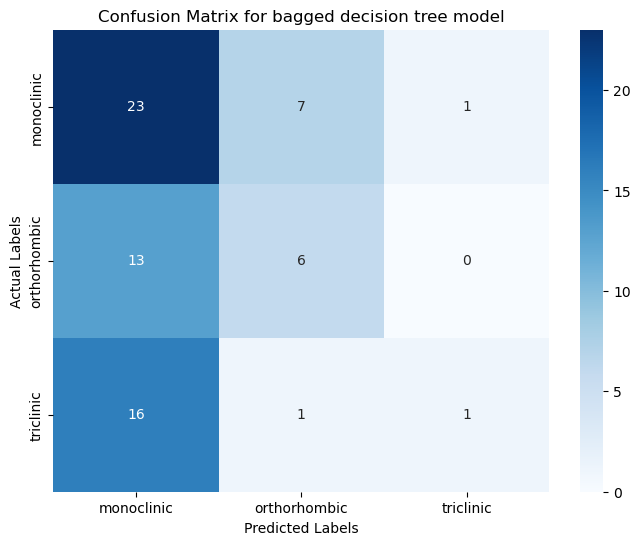

In [25]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
################################
#### ADD YOUR SOLUTION HERE ####
################################
##### replace these lines ######

# Use the bagged decsion tree made in a previous task 
bagged_2 = BaggingClassifier(estimator=model_2, n_estimators=10, random_state=42)
bagged_2.fit(X_train, y_train)

# Run the evaluation model made in a previous task
evaluate_model(bagged_2, X, y)

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred) # Initialise confusion matrix
plt.figure(figsize=(8, 6)) # Set size of matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues') # Make it a heat map and ive chosen to use different blues as the colurs 
class_names = ['monoclinic', 'orthorhombic', 'triclinic']  # add the original class names that we changed to 0,1,2 in a previos task, this is for better readability.
plt.xticks(ticks=[0.5, 1.5, 2.5], labels=class_names)  # Set the x-tick labels with class names
plt.yticks(ticks=[0.5, 1.5, 2.5], labels=class_names)  # Set the y-tick labels with class names
plt.title('Confusion Matrix for bagged decision tree model') # Set title
plt.ylabel('Actual Labels') # set name of x label and y label is below
plt.xlabel('Predicted Labels')
plt.show() # show the confucion matrix

**ANSWER CELL**

The final ML model i chose for the dataset was the bagged verison of teh decsion trees model. The reason for this is because it had the highest accuracy score (0.60) as well as taking the other metrics into account (f1 score, precision, recall) it seemed to perform the best in more cases than any other model or bagged model or voting ensemble. However, from looking at the metrics used as well as the confusion matrix, we can see that the model is far from perfect and still gives false negatives and false positives. For example, if we look at the confusion matrix, we can see that monoclinic was a true positive in the most cases (23) however 16 times it was classed as triclinic and 13 times as orthorhombic. This is not very accurate at all. This could be down to things such as the model itself, my parameter selection and tuning or noisey data in the dataset that makes it harder for the model to predict. Orthorhombic was correctly classified 6 times but it was wrongly classified as monoclinic more times (7) than it correctly predicted as orthorhombic showing a lack of accuracy in this area. it predicted it as triclinic 1 time which is better but cant stop us from ignoring the bad results. Triclinic was correctly identified 1 time and wronly identified as monoclinic 1 time meaning it only correctly predicts the category 50% of the time. Things we need to take into account for these results include the fact that there is significantly more monoclinic batteries in the data set than orthorhombic and triclinic which had the least. The variety of the dataset is something else we must consider as this will have made it much harder for the model to predict.

In conclusion, the bagged decision tree model perfomed the best out of the models I chose however there is improvements to be made in order to refine and improve the success in correctly identifying the class of the batteries in this dataset.

## Code References 

[1] Divyansh Agrawal: Crystal System Properties for Li-ion batteries (dataset) https://www.kaggle.com/datasets/divyansh22/crystal-system-properties-for-liion-batteries/discussion (accessed 28/08/2023)

[2] Mateen Ulhaq, Mike Hordecki (code) https://stackoverflow.com/a/522578/884412 (accessed 24/08/2023)

[3] Kumar, A.(code) Replace Missing Values with Mean, Median & Mode. https://vitalflux.com/pandas-impute-missing-values-mean-median-mode/#:~:text=Mean%20imputation%20is%20often%20used. (accessed 16/12/2023)

[4] No author (code) Encoding a string:  https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html  (accessed 18/12/2023)

[5] No author (code) train test split: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html (accessed 18/12/2023)

[6] Tom (code) https://stackoverflow.com/a/65895462 (accessed 19/12/2023)

[7] haneulkim (code) https://stackoverflow.com/q/66600369 (accessed 19/12/2023)

[8] No author (code) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.StratifiedKFold.html (accessed 21/12/2023)

[9] No author (code) https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_val_score.html (accessed 21/12/2023)

[10] No author (code) https://scikit-learn.org/stable/modules/cross_validation.html (accessed 21/12/2023)

[11] No author (code) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html (accessed 21/12/2023)

[13] No author (code) https://scikit-learn.org/stable/modules/tree.html (accessed 29/12/2023)

[14] No author (code) https://scikit-learn.org/stable/modules/svm.html (accessed 29/12/2023)

[15] Muhammad Bilal Shahid, Venkatachalam (code) https://stackoverflow.com/questions/62115384/how-to-use-custom-metrics-in-keras-model-while-using-grid-search-cv (accessed 29/12/2023)

[16] Michael Recachinas, Klausos Klausos, Sean Easter (code) https://stackoverflow.com/q/34189107 (accessed 30/12/2023)

[17] No author (code) https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html (accessed 31/12/2023)

[18] No author (code) https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html#sklearn.metrics.ConfusionMatrixDisplay.from_predictions (accessed 08/01/2024)

[19] No author (code) https://seaborn.pydata.org/generated/seaborn.heatmap.html (accessed 08/01/2024)

## Differences in referenced code


[3] used the median code and added relevant features with missing values

[4] used the import and the .fit_transform parameter

[5] used train_test_split function and changed test_size to fit requirements

[6] used the KNeighborsClassifier function as well as the .fit function

[7] used the accuracy_score function

[8] used stratifiedKFold line adn changed number of splits, random state, and shuffle

[9] used cross_val_score function with my own variables as parameters.

[10] used the for loop with the skf.split function and used my own data in the loop

[11] used classification_report function and changed target names to the class labels.

[13] used the basic code to implement the classifier, used my own code for parameters.

[14] found how to use the SVC() function and used it within my own adapted code.

[15] used the basic GridSearchCV function and found how to implement it from muhammad's code. I also used the scoring parameter from 'Venkatachalam' who responded to muhammad

[16] found how to use 'best_estimator_' as well as what situation it can be used it to apply it to my own code. used the main question and some tips from the answer.

[17] used the baggingclassifier() function and some of the parameters.

[18] used the code to initialise the confusion matrix with confusion_matrix() and used y_test, y_pred as the parameters.

[19] used the sns.heatmap code and used the parameters: annot,fmt,cmap

## References
Berrar, D. (2019). Cross-Validation. Encyclopedia of Bioinformatics and Computational Biology, 1, pp.542–545. doi:https://doi.org/10.1016/b978-0-12-809633-8.20349-x.

Büchlmann, P. and Yu, B. (2002). Analyzing Bagging. The Annals of Statistics, [online] 30(4), pp.927–961. Available at: https://www.jstor.org/stable/1558692 [Accessed 14 Jan. 2024].

Liashchynskyi, P. and Liashchynskyi, P. (2019). Grid Search, Random Search, Genetic Algorithm: A Big Comparison for NAS. arXiv:1912.06059 [cs, stat]. [online] Available at: https://arxiv.org/abs/1912.06059.

Mechelli, A. and Vieira, S. (2019). Machine Learning: Methods and Applications to Brain Disorders. [online] Google Books. Academic Press. Available at: https://books.google.co.uk/books?hl=en&lr=&id=72C-DwAAQBAJ&oi=fnd&pg=PA101&ots=3VBXDdotB7&sig=jvtbUZmX3J8T-yOfgLKaV_AZRww&redir_esc=y#v=onepage&q&f=false [Accessed 14 Jan. 2024].

Peterson, L. (2009). K-nearest neighbor. Scholarpedia, [online] 4(2), p.1883. doi:https://doi.org/10.4249/scholarpedia.1883.

Sokolova, M., Japkowicz, N. and Szpakowicz, S. (2006). Beyond Accuracy, F-Score and ROC: A Family of Discriminant Measures for Performance Evaluation. Lecture Notes in Computer Science, pp.1015–1021. doi:https://doi.org/10.1007/11941439_114.

Swain, P.H. and Hauska, H. (1977). The decision tree classifier: Design and potential. IEEE Transactions on Geoscience Electronics, 15(3), pp.142–147. doi:https://doi.org/10.1109/tge.1977.6498972.

Wong, T. and Yeh, P. (2020). Reliable Accuracy Estimates from k-Fold Cross Validation. IEEE Transactions on Knowledge and Data Engineering, [online] 32(8), pp.1586–1594. doi:https://doi.org/10.1109/TKDE.2019.2912815.

Zhang, Z. (2016). Missing data imputation: focusing on single imputation. Annals of translational medicine, [online] 4(1), p.9. doi:https://doi.org/10.3978/j.issn.2305-5839.2015.12.38.